In [27]:
from typing_extensions import TypedDict, List
from langchain.chat_models import init_chat_model
from langchain_core.messages import AnyMessage
from langgraph.graph import StateGraph
from langgraph.graph import END, START
from typing import Annotated
from langgraph.graph.message import add_messages
import os
import dotenv

dotenv.load_dotenv(dotenv_path="../../.venv")

False

In [28]:
llm = init_chat_model(
    "ollama:gpt-oss:latest",
    base_url=os.environ.get("OLLAMA_BASE_URL"),
)

llm.invoke([{"role": "user", "content": "Hello"}])

AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={}, response_metadata={'model': 'gpt-oss:latest', 'created_at': '2025-11-20T06:31:46.133455951Z', 'done': True, 'done_reason': 'stop', 'total_duration': 457049967, 'load_duration': 149270692, 'prompt_eval_count': 68, 'prompt_eval_duration': 11550163, 'eval_count': 45, 'eval_duration': 265738264, 'logprobs': None, 'model_name': 'gpt-oss:latest'}, id='run--e00f3a2c-406f-4cb7-9c17-dbbfecb71174-0', usage_metadata={'input_tokens': 68, 'output_tokens': 45, 'total_tokens': 113})

In [29]:
class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]


graph_builder = StateGraph(State)

In [30]:
def chatbot(state: State) -> State:
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

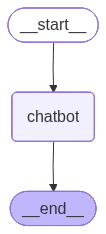

In [31]:
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()
graph

In [32]:
graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "How are you?",
            }
        ]
    }
)

{'messages': [HumanMessage(content='How are you?', additional_kwargs={}, response_metadata={}, id='96379934-0ee3-4b3b-8c5f-19a737621abe'),
  AIMessage(content='I’m doing great—thanks for asking! How about you?', additional_kwargs={}, response_metadata={'model': 'gpt-oss:latest', 'created_at': '2025-11-20T06:31:47.075790562Z', 'done': True, 'done_reason': 'stop', 'total_duration': 436417191, 'load_duration': 147885092, 'prompt_eval_count': 71, 'prompt_eval_duration': 28140974, 'eval_count': 40, 'eval_duration': 234313701, 'logprobs': None, 'model_name': 'gpt-oss:latest'}, id='run--7a2250b9-3b91-42b1-a569-bfe79e338ee5-0', usage_metadata={'input_tokens': 71, 'output_tokens': 40, 'total_tokens': 111})]}